**🎓 Giáo sư Dược học trình bày Chủ đề T11: Dự đoán LogP và TPSA của các hợp chất ChEMBL**

---

### 🧪 1. Phân tích nội dung chủ đề (Bilingual)

**EN:**
This topic focuses on predicting two important molecular properties—LogP (partition coefficient) and TPSA (topological polar surface area)—for compounds in ChEMBL. These properties are key indicators of drug-likeness, bioavailability, and permeability.
**VI:**
Chủ đề này tập trung vào việc dự đoán hai thông số quan trọng của phân tử là LogP (hệ số phân bố) và TPSA (diện tích bề mặt phân cực topo) cho các hợp chất trong cơ sở dữ liệu ChEMBL. Đây là các chỉ số then chốt để đánh giá độ giống thuốc, khả năng hấp thu và thấm qua màng.

---

### 📊 2. Mô hình phân tích (EN/VI)

**EN:**
The analysis includes the following stages:

1. Extract canonical SMILES from ChEMBL.
2. Use RDKit to compute LogP and TPSA.
3. Save the results for downstream filtering or QSAR modeling.

**VI:**
Phân tích gồm các bước sau:

1. Trích xuất SMILES chuẩn từ cơ sở dữ liệu ChEMBL.
2. Tính LogP và TPSA bằng thư viện RDKit.
3. Lưu kết quả để sử dụng cho lọc dữ liệu hoặc xây dựng mô hình QSAR.

---

### 📂 3. Cách tổ chức theo AIMLOps Template (EN/VI)

* `.sql` saved as `../data/T11_1_logp_tpsa.csv` (EN: Run on pgAdmin)
* `.ipynb` saved as `notebook/T11_2_logp_tpsa_analysis.ipynb`
* Use `os.path.join(base_path, "data", ...)` for consistent path handling.

---

### 🧾 4. Code mẫu SQL & Python (English only)

#### ✅ **SQL 1 – Extract 100 SMILES**

```sql
-- File: T11_1_extract_smiles.sql
SELECT 
    m.molregno, 
    cs.canonical_smiles
FROM compound_structures cs
JOIN molecule_dictionary m ON cs.molregno = m.molregno
LIMIT 100;
```

#### ✅ **Python 1 – Compute LogP and TPSA**

```python
# File: T11_2_logp_tpsa_analysis.ipynb
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import os
import warnings

# Disable UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

base_path = ".."
file_path = os.path.join(base_path, "data", "T11_1_logp_tpsa.csv")
df = pd.read_csv(file_path)

def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        return logp, tpsa
    else:
        return None, None

df[['LogP', 'TPSA']] = df['canonical_smiles'].apply(
    lambda x: pd.Series(compute_properties(x))
)

output_path = os.path.join(base_path, "data", "T11_2_logp_tpsa_results.csv")
df.to_csv(output_path, index=False)
```

---

### 🔁 5. Thêm 5 ví dụ mở rộng

#### **SQL 2 – Filter by molecule properties**

```sql
-- Only extract compounds from approved drugs
SELECT 
    m.molregno, cs.canonical_smiles
FROM compound_structures cs
JOIN molecule_dictionary m ON cs.molregno = m.molregno
WHERE m.max_phase = 4
LIMIT 100;
```

#### **Python 2 – Histogram of LogP**

```python
import matplotlib.pyplot as plt

plt.hist(df['LogP'].dropna(), bins=20)
plt.title("Distribution of LogP")
plt.xlabel("LogP")
plt.ylabel("Count")
plt.show()
```

#### **SQL 3 – Get only valid SMILES**

```sql
SELECT 
    cs.canonical_smiles 
FROM compound_structures cs
WHERE cs.canonical_smiles IS NOT NULL
LIMIT 100;
```

#### **Python 3 – Filter molecules with TPSA < 90**

```python
filtered_df = df[df['TPSA'] < 90]
filtered_df.to_csv(os.path.join(base_path, "data", "T11_filtered_tpsa.csv"), index=False)
```

#### **Python 4 – Scatter plot LogP vs TPSA**

```python
plt.scatter(df['LogP'], df['TPSA'])
plt.xlabel("LogP")
plt.ylabel("TPSA")
plt.title("LogP vs TPSA")
plt.grid(True)
plt.show()
```

---

Nếu bạn muốn tôi xuất ra file `.ipynb`, `.sql`, hoặc tạo dashboard Streamlit cho chủ đề này, vui lòng cho biết yêu cầu tiếp theo.


In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

base_path = ".."
file_path = os.path.join(base_path, "data", "T11_1_logp_tpsa.csv")
df = pd.read_csv(file_path)

# Clean SMILES
df['canonical_smiles'] = df['canonical_smiles'].astype(str)
df = df[df['canonical_smiles'].notna() & (df['canonical_smiles'] != 'nan')]

def compute_properties(smiles):
    if not isinstance(smiles, str) or smiles.strip() == "" or smiles == 'nan':
        return None, None
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        return logp, tpsa
    else:
        return None, None

df[['LogP', 'TPSA']] = df['canonical_smiles'].apply(
    lambda x: pd.Series(compute_properties(x))
)

output_path = os.path.join(base_path, "data", "T11_2_logp_tpsa_results.csv")
df.to_csv(output_path, index=False)
df

molregno                                   canonical_smiles     LogP  \
0         1       Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl  2.11362   
1         2    Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1  1.33190   
2         3   Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1  2.27274   
3         4       Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1  1.46022   
4         5     Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1  2.11362   
..      ...                                                ...      ...   
95      119  CCCC(C)NC(=O)OCC1CN(C(=O)c2cc(OC)c(OC)c(OC)c2)...  3.61980   
96      120                   O=C(C1CCCCN1)N1CCN(Cc2cccnc2)CC1  0.86790   
97      121                 c1cncc(CN2CCN(C[C@@H]3CCCN3)CC2)c1  0.95120   
98      122                 c1cc(CN2CCN(C[C@@H]3CCCN3)CC2)ccn1  0.95120   
99      123                    O=c1oc2c(O)c(O)ccc2c2cc(F)ccc12  2.49650   

      TPSA  
0    84.82  
1   108.61  
2    87.98  
3    84.82  
4    84.82  
..     ...  
95  134.33  
96   48.47  
97   31.40  
98   31.40  
99   70.67  

[100 rows x 4 columns]

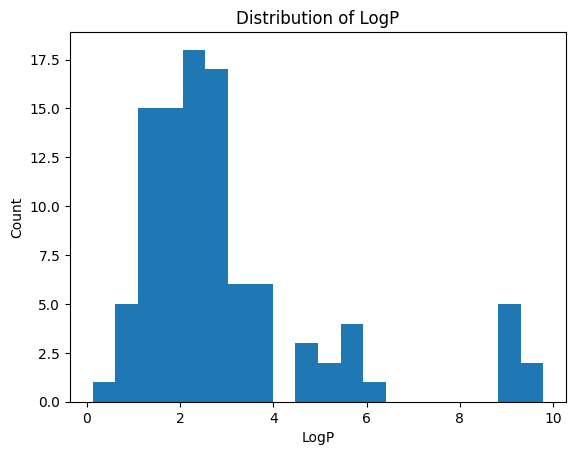

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['LogP'].dropna(), bins=20)
plt.title("Distribution of LogP")
plt.xlabel("LogP")
plt.ylabel("Count")
plt.show()


In [6]:
filtered_df = df[df['TPSA'] < 90]
filtered_df.to_csv(os.path.join(base_path, "data", "T11_filtered_tpsa.csv"), index=False)
filtered_df

molregno                                  canonical_smiles     LogP   TPSA
0         1      Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl  2.11362  84.82
2         3  Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1  2.27274  87.98
3         4      Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1  1.46022  84.82
4         5    Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1  2.11362  84.82
5         6        Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1  1.46022  84.82
..      ...                                               ...      ...    ...
92      116                            c1cncc([C@@H]2CCCN2)c1  1.50610  24.92
96      120                  O=C(C1CCCCN1)N1CCN(Cc2cccnc2)CC1  0.86790  48.47
97      121                c1cncc(CN2CCN(C[C@@H]3CCCN3)CC2)c1  0.95120  31.40
98      122                c1cc(CN2CCN(C[C@@H]3CCCN3)CC2)ccn1  0.95120  31.40
99      123                   O=c1oc2c(O)c(O)ccc2c2cc(F)ccc12  2.49650  70.67

[61 rows x 4 columns]

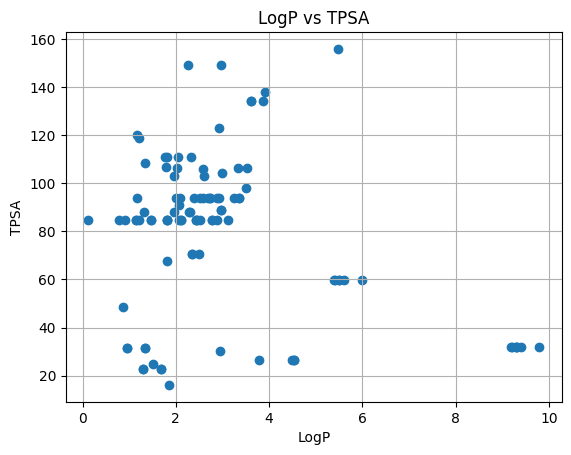

In [7]:
plt.scatter(df['LogP'], df['TPSA'])
plt.xlabel("LogP")
plt.ylabel("TPSA")
plt.title("LogP vs TPSA")
plt.grid(True)
plt.show()
